In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis.gensim

import numpy as np

from PyPDF2.utils import PdfReadError

In [22]:
from utils import read_pdf, url_parse, plotting

In [23]:
from nlp.topic import get_topics, format_topics_sentences, find_keywords

In [24]:
with open("data/urls-st.txt", "r") as file:
    urls = file.read().split("\n")
    
urls = {url_parse.get_name(u): u for u in urls if read_pdf.is_url(u)}

In [25]:
sentences = {}

for company, url in urls.items():
    try: 
        s = read_pdf.path_to_sentences(url)
        sentences[company] = s
        
    except PdfReadError:
        print(f"PdfReadError at {company}")

PdfReadError at hsbc


### Analysis of a company

In [27]:
list(sentences.keys())

['ctfassets', 'apg', 'dws', 'jpmorgan', 'lgima', 'ssga']

In [28]:
company = "jpmorgan"

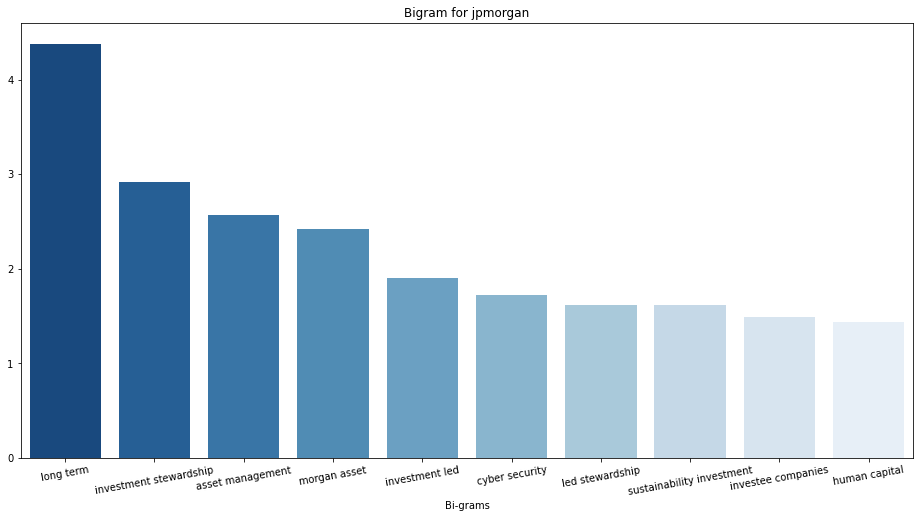

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))

plotting.plot_bigrams(sentences[company], ax = ax)
ax.set_title(f"Bigram for {company}")

fig.show()

In [30]:
lda, corpus, words = get_topics(sentences[company])

In [31]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary=words, mds='mmds')

In [32]:
pyLDAvis.display(vis)
